In [4]:
#mount google drive
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Analysis

In [5]:
import pandas as pd

In [7]:
train_df = pd.read_csv("train.csv")

In [8]:
print(type(train_df))

<class 'pandas.core.frame.DataFrame'>


In [9]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [13]:
train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


# Data Visualization

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
sexDict = {'male': 0, 'female': 1}
train_df.Sex = [sexDict[item] for item in train_df.Sex]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# Correlation
data = {
'Pclass' :train_df['Survived'].corr(train_df['Pclass']),
'Sex' :train_df['Survived'].corr(train_df['Sex']),
'Age' :train_df['Survived'].corr(train_df['Age']),
'Fare' :train_df['Survived'].corr(train_df['Fare'])
}
data

{'Pclass': -0.3384810359610148,
 'Sex': 0.5433513806577555,
 'Age': -0.07722109457217768,
 'Fare': 0.2573065223849625}

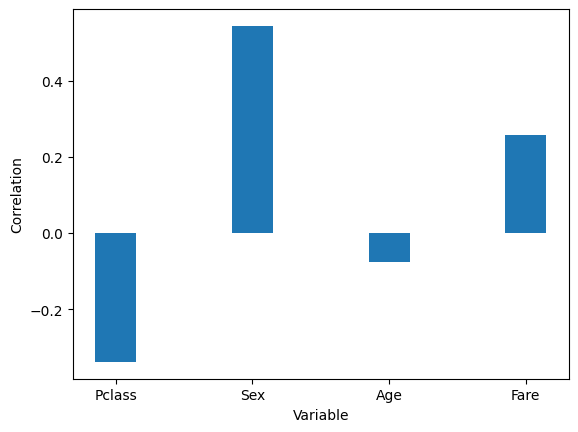

In [19]:
plt.bar(list(data.keys()), list(data.values()), width= 0.3)
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.show()

In [20]:
print(train_df[['Sex', 'Survived']].groupby('Sex').sum())

     Survived
Sex          
0         109
1         233


In [21]:
survived_sex = train_df.groupby('Sex')['Survived'].sum()
survived_sex

Sex
0    109
1    233
Name: Survived, dtype: int64

In [22]:
survived_sex.index

Int64Index([0, 1], dtype='int64', name='Sex')

In [23]:
survived_sex.values

array([109, 233])

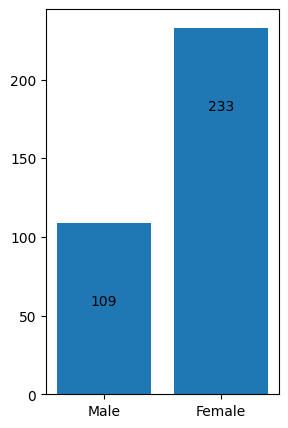

In [24]:
plt.figure(figsize=(3,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.xticks([0,1],['Male', 'Female'])
for i, value in enumerate(survived_sex.values):
   plt.text(i, value-50, str(value), horizontalalignment='center', verticalalignment='center')
plt.show()

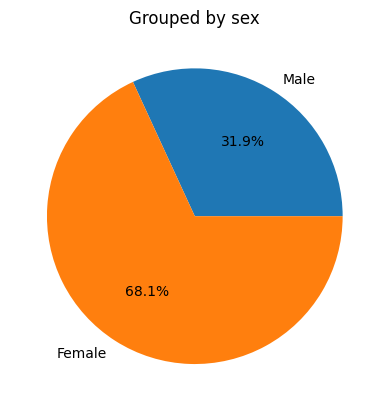

In [25]:
plt.title('Grouped by sex')
plt.pie(survived_sex.values, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.show()

In [26]:
pclass_count = train_df.groupby('Pclass')['Pclass'].count()
pclass_count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

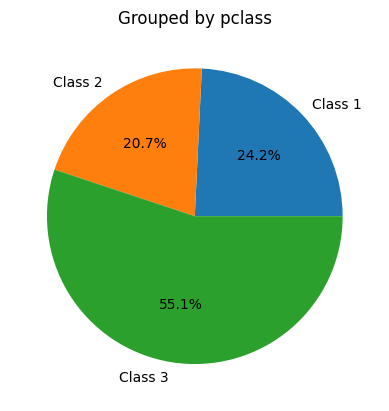

In [27]:
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], autopct='%1.1f%%')
plt.show()

In [28]:
train_df[train_df['Pclass']==1]['Survived'].count()

216

In [29]:
train_df[train_df['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

<Axes: >

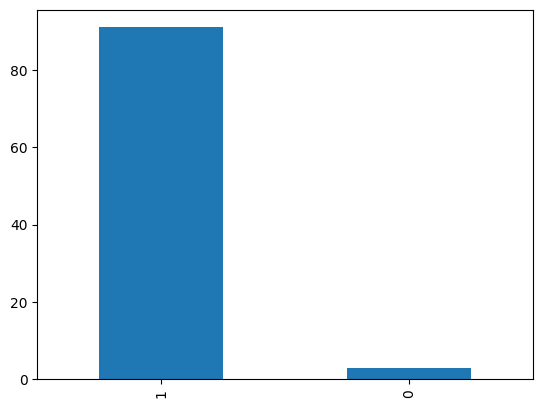

In [30]:
train_df[(train_df['Pclass']==1) & (train_df['Sex']==1) ]['Survived'].value_counts().plot(kind='bar')

# Missing Values
### How To Handle Missing Value?
### 1- Deleting
### 2- Imputing

In [31]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
train_df.isnull().sum().sum()

866

## Deleting 

In [34]:
# Deleting the entire row
df = train_df.dropna(axis=0)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [35]:
# Deleting the entire column
df = train_df.drop(['Age'],axis=1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Imputing
### 1- Replacing With Arbitrary Value
### 2- Replacing With Mean
### 3- Replacing With Mode

In [36]:
# Replacing With Arbitrary Value
df['Age'] = train_df['Age'].fillna(30)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,NaN,S,35.0
5,6,0,3,"Moran, Mr. James",0,0,0,330877,8.4583,NaN,Q,30.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,0,0,17463,51.8625,E46,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,3,1,349909,21.0750,NaN,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,0,2,347742,11.1333,NaN,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,0,237736,30.0708,NaN,C,14.0


In [37]:
# Replacing With Mean
df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,NaN,S,35.000000
5,6,0,3,"Moran, Mr. James",0,0,0,330877,8.4583,NaN,Q,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",0,0,0,17463,51.8625,E46,S,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",0,3,1,349909,21.0750,NaN,S,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,0,2,347742,11.1333,NaN,S,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,0,237736,30.0708,NaN,C,14.000000


In [38]:
# Replacing With Mode
df['Cabin'] = train_df['Cabin'].fillna(train_df['Cabin'].mode()[0])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,B96 B98,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,B96 B98,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,B96 B98,S,35.000000
5,6,0,3,"Moran, Mr. James",0,0,0,330877,8.4583,B96 B98,Q,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",0,0,0,17463,51.8625,E46,S,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",0,3,1,349909,21.0750,B96 B98,S,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,0,2,347742,11.1333,B96 B98,S,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,0,237736,30.0708,B96 B98,C,14.000000


# Feature Engineering

In [40]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [41]:
all_df = pd.concat([train_df, test_df], sort=True).reset_index(drop=True)
all_df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [42]:
all_df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [43]:
# to create 10 equal sized groupings of the data
all_df['Age'] = pd.qcut(all_df['Age'], q=10)

In [44]:
all_df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,"(36.0, 42.0]",C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,"(36.0, 42.0]",NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [45]:
# to keep titles like Mr, Mrs, etc
(all_df['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]).unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [46]:
all_df['Title'] = all_df['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]

In [47]:
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,"(19.0, 22.0]",NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,"(36.0, 42.0]",C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,"(25.0, 28.0]",NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,"(31.0, 36.0]",C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,"(31.0, 36.0]",NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [48]:
all_df['Title'] = all_df['Title'].replace([' Mrs',' Miss',' Mme',' Ms','Lady',' the Countess',' Dona'], 'Miss/Mrs/Ms')
all_df['Title'] = all_df['Title'].replace([' Don',' Rev',' Dr',' Major',' Sir',' Mlle',' Col',' Jonkheer'], 'Dr/Military/Noble')

In [49]:
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,"(19.0, 22.0]",NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,"(36.0, 42.0]",C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Miss/Mrs/Ms
2,"(25.0, 28.0]",NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss/Mrs/Ms
3,"(31.0, 36.0]",C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Miss/Mrs/Ms
4,"(31.0, 36.0]",NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


## To Change Feature Formats

In [50]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [51]:
non_numeric_features = ['Sex']

for feature in non_numeric_features:
  all_df[feature] = LabelEncoder().fit_transform(all_df[feature])

In [52]:
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,"(19.0, 22.0]",NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr
1,"(36.0, 42.0]",C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Miss/Mrs/Ms
2,"(25.0, 28.0]",NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss/Mrs/Ms
3,"(31.0, 36.0]",C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Miss/Mrs/Ms
4,"(31.0, 36.0]",NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr


# Outlier Detection

In [53]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
list1 = [100, 200, 300, 40000]
list2 = [100, 200, 300]

In [55]:
print(statistics.mean(list1))
print(statistics.mean(list2))

10150
200


In [56]:
print(statistics.stdev(list1))
print(statistics.stdev(list2))

19900.167503482644
100.0


In [57]:
print(statistics.median(list1))
print(statistics.median(list2))

250.0
200


In [59]:
df = pd.read_csv("train.csv")

<Axes: xlabel='Fare'>

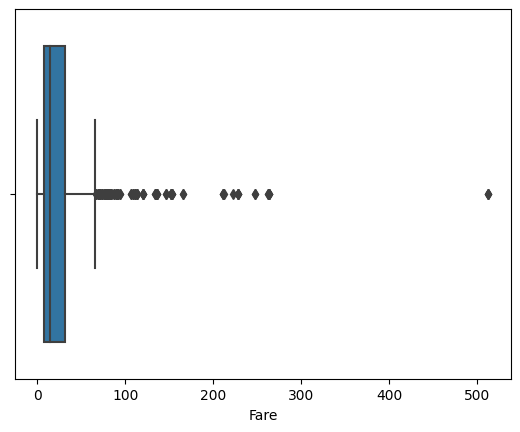

In [60]:
sns.boxplot(x=df['Fare'])
# sns.boxplot(x=df['Fare'], data=df)

<Axes: ylabel='Frequency'>

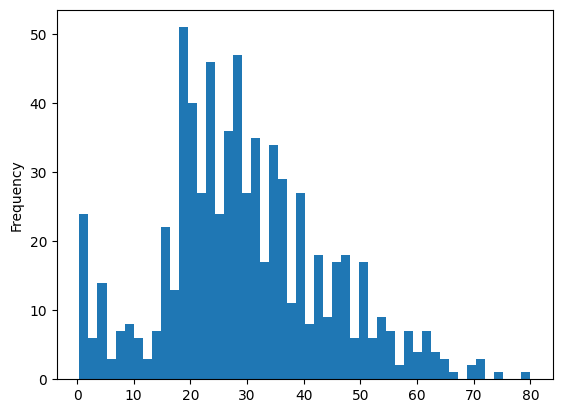

In [61]:
df['Age'].plot.hist(bins=50)

## Z-Score
#### The outliers are the data point that are in the tails of the distribution and far from the mean

In [63]:
df = pd.read_csv("train.csv")

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


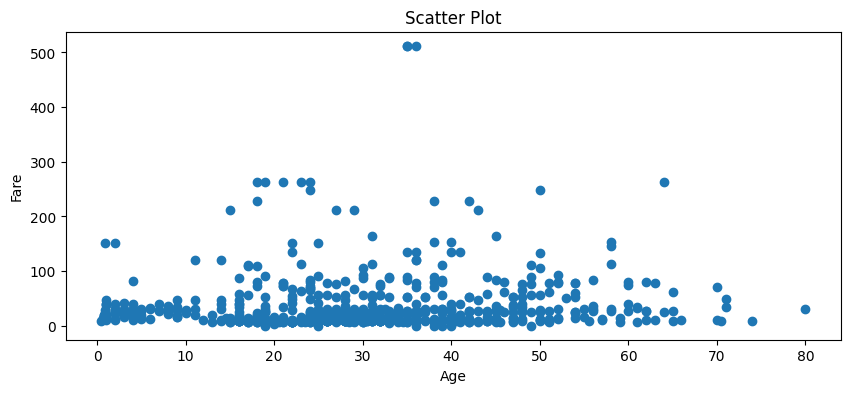

In [65]:
def scatter_plots(df1, df2):
  fig, ax = plt.subplots(figsize=(10,4))
  ax.scatter(df1, df2)
  ax.set_xlabel('Age')
  ax.set_ylabel('Fare')
  plt.title('Scatter Plot')
  plt.show()
  
scatter_plots(df['Age'], df['Fare'])

In [66]:
age = 25 # Assume the age of the passenger is 25 years old
mean_age = df['Age'].mean()
std_age = df['Age'].std()
z_score = (age - mean_age) / std_age

# Print the z-score
print('The z-score of the age of a passenger who survived is:', z_score)

The z-score of the age of a passenger who survived is: -0.32348594017906934


In [71]:
# Compute the z-score of the age variable
z_scores = zscore(df['Age'])

In [70]:
# Find the outliers using a threshold of +/- 3 standard deviations from the mean
age_outliers = df[(z_scores > 2.5) | (z_scores < -2.5)]['Age']

# Print the age outliers
print('The age outliers in the Titanic dataset are:')
print(age_outliers)

In [69]:
# or
from scipy.stats import zscore
df["age_zscore"] = zscore(df["Age"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_zscore
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [73]:
df['is_outlier'] = df['age_zscore'].apply(
    lambda x: x<-2.5 or x>2.5
)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_zscore,is_outlier
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,False


# Survival predisiont of passengers on the Titanic based on their demographic and ticket information

In [74]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [76]:
# Load the Titanic dataset
titanic = pd.read_csv("train.csv")

In [77]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [78]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
titanic.shape

(891, 12)

In [80]:
# Data preprocessing

# Remove irrelevant columns
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Replace missing values with the median of the respective column
titanic.fillna(titanic.median(), inplace=True)

# Convert categorical variables into dummy variables
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'])

<ipython-input-80-23034b77e776>:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.fillna(titanic.median(), inplace=True)


In [81]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [82]:
titanic.shape

(891, 11)

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic.drop(['Survived'], axis=1), titanic['Survived'], test_size=0.3, random_state=42)

In [84]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [85]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [86]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7649253731343284
